In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:

data, sr = librosa.load(path='./samples/Guitar Body Hit 1-Omni mix.flac', sr=None)

In [ ]:
cent = librosa.feature.spectral_centroid(y=data, sr=sr)
cent

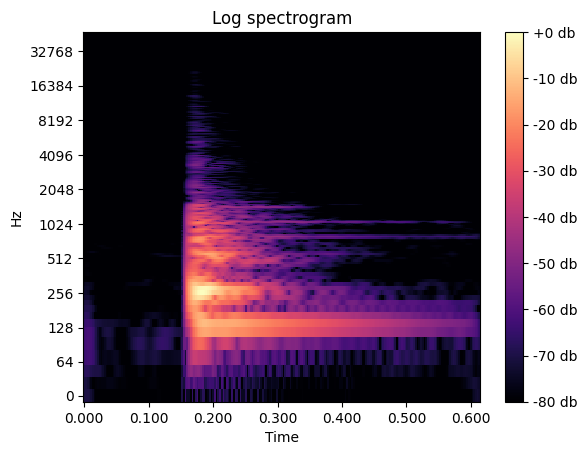

In [10]:
D = librosa.stft(data, hop_length=256, n_fft=4096)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
ax.set(title='Log spectrogram')
img = librosa.display.specshow(S_db, hop_length=256, sr=sr, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f db")


[Text(0, 0.5, 'Harmonics')]

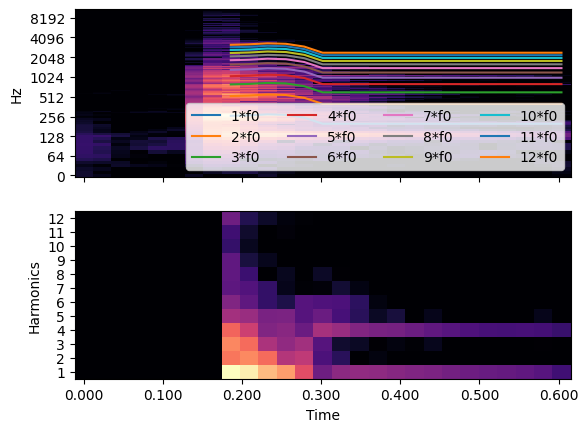

In [23]:
y, sr = librosa.load('./samples/Guitar Body Hit 1-Omni mix.flac')
f0, voicing, voicing_p = librosa.pyin(y=y, sr=sr, fmin=200, fmax=700)
S = np.abs(librosa.stft(y))
freqs = librosa.fft_frequencies(sr=sr)
harmonics = np.arange(1, 13)
f0_harm = librosa.f0_harmonics(S, freqs=freqs, f0=f0, harmonics=harmonics)

import matplotlib.pyplot as plt
fig, ax =plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
times = librosa.times_like(f0)
for h in harmonics:
    ax[0].plot(times, h * f0, label=f"{h}*f0")
ax[0].legend(ncols=4, loc='lower right')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(f0_harm, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[1].set_yticks(harmonics-1)
ax[1].set_yticklabels(harmonics)
ax[1].set(ylabel='Harmonics')

In [61]:
#https://stackoverflow.com/questions/53506970/how-can-i-get-the-specific-frequency-at-a-specific-timestamp-in-an-audio-file
# https://notebook.community/cloudedbats/cloudedbats_dsp/notebooks/experimental/detect_multiple_harmonics

data, sr = librosa.load(path='./samples/Guitar Body Hit 1-Omni mix.flac', sr=None, offset=0.172, duration=0.223-0.172)
n_fft = 1024
hop_length = 512
spec = np.abs(librosa.stft(data, n_fft=n_fft, hop_length=hop_length))
freqs = librosa.fft_frequencies(n_fft=n_fft, sr=sr)
times = librosa.frames_to_time(spec[0], sr=sr, n_fft=n_fft, hop_length=hop_length)
print('spectrogram size', spec.shape)
fft_bin = 12
time_idx = 9

spec_rotated = np.rot90(spec)[time_idx]
db_amps = librosa.amplitude_to_db(spec)
peaks = librosa.util.localmax(spec_rotated)

peak_indicis = []
for i, v in enumerate(peaks):
    if v:
        peak_indicis.append(i)

for p in peak_indicis:
    amp = db_amps[p]
    freq = freqs[p]
    #if amp > 0.1:
    print(f"Peak {p} freq {freqs[p]} amp {spec[p, 9]}")





spectrogram size (513, 10)
Peak 3 freq 281.25 amp 20.37248420715332
Peak 8 freq 750.0 amp 4.716370105743408
Peak 12 freq 1125.0 amp 3.1753509044647217
Peak 15 freq 1406.25 amp 1.4736310243606567
Peak 23 freq 2156.25 amp 0.31349560618400574
Peak 36 freq 3375.0 amp 0.2144007384777069
Peak 44 freq 4125.0 amp 0.1858976036310196
Peak 51 freq 4781.25 amp 0.157614603638649
Peak 56 freq 5250.0 amp 0.15411794185638428
Peak 60 freq 5625.0 amp 0.14049823582172394
Peak 65 freq 6093.75 amp 0.1274198591709137
Peak 71 freq 6656.25 amp 0.10894127190113068
Peak 79 freq 7406.25 amp 0.08793942630290985
Peak 86 freq 8062.5 amp 0.09283090382814407
Peak 92 freq 8625.0 amp 0.07362625747919083
Peak 96 freq 9000.0 amp 0.07474520802497864
Peak 103 freq 9656.25 amp 0.06863823533058167
Peak 112 freq 10500.0 amp 0.06463500112295151
Peak 117 freq 10968.75 amp 0.06845960766077042
Peak 123 freq 11531.25 amp 0.0573146678507328
Peak 135 freq 12656.25 amp 0.06038540229201317
Peak 141 freq 13218.75 amp 0.0583746246993541